In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

In [99]:
df = pd.read_csv('../data/df_train.csv')
nf = np.load('../data/noise.npy')

df['s1_diff'] = df['s1'].diff(1)
df['s2_diff'] = df['s2'].diff(1)
df['s3_diff'] = df['s3'].diff(1)
df['s4_diff'] = df['s4'].diff(1)
df['s5_diff'] = df['s5'].diff(1)
df['s6_diff'] = df['s6'].diff(1)
df['s1_const'] = df['s1']+1
df['s2_const'] = df['s2']+1
df['s3_const'] = df['s3']+1
df['s4_const'] = df['s4']+1
df['s5_const'] = df['s5']+1
df['s6_const'] = df['s6']+1

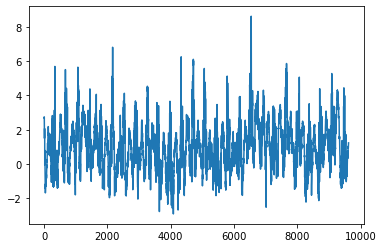

In [100]:
plt.plot(df['s1_const'])

In [17]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

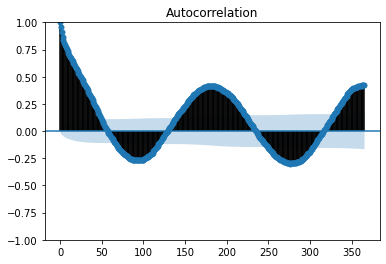

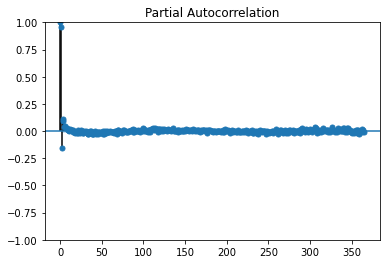

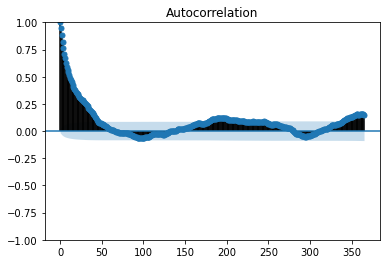

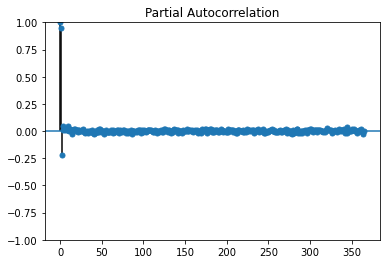

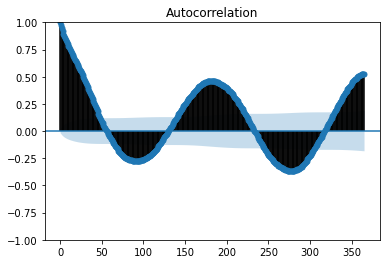

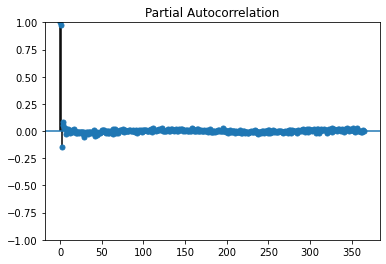

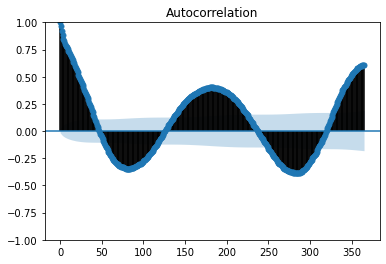

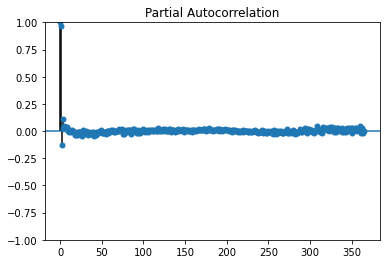

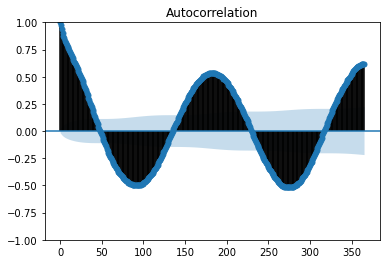

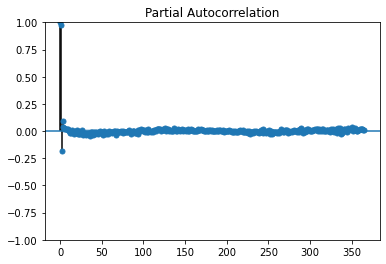

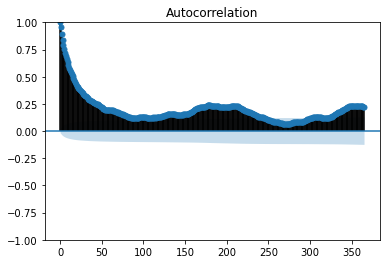

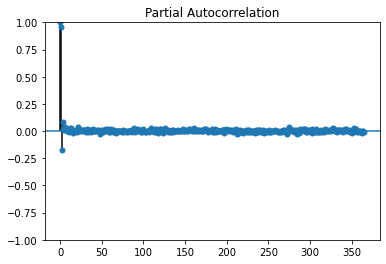

In [114]:
plot_acf(df['s1'], lags = 365)
plt.show()
plot_pacf(df['s1'], lags = 365)
plt.show()
plot_acf(df['s2'], lags = 365)
plt.show()
plot_pacf(df['s2'], lags = 365)
plt.show()
plot_acf(df['s3'], lags = 365)
plt.show()
plot_pacf(df['s3'], lags = 365)
plt.show()
plot_acf(df['s4'], lags = 365)
plt.show()
plot_pacf(df['s4'], lags = 365)
plt.show()
plot_acf(df['s5'], lags = 365)
plt.show()
plot_pacf(df['s5'], lags = 365)
plt.show()
plot_acf(df['s6'], lags = 365)
plt.show()
plot_pacf(df['s6'], lags = 365)
plt.show()


In [73]:
df_small = df[0:100].copy()
df_small

,dates,s1,s2,s3,s4,s5,s6,s1_diff,s2_diff,s3_diff,s4_diff,s5_diff,s6_diff,s1_const
0,1981-09-01,1.686270,-0.794102,1.148352,1.158114,2.024443,1.038107,NaN,NaN,NaN,NaN,NaN,NaN,2.686270
1,1981-09-02,1.749894,-0.742321,1.016314,1.281761,2.149033,0.601557,0.063624,0.051781,-0.132037,0.123647,0.124590,-0.436550,2.749894
2,1981-09-03,1.475208,-0.749156,0.936533,1.386429,2.176159,3.646527,-0.274686,-0.006835,-0.079781,0.104668,0.027126,3.044970,2.475208
3,1981-09-04,1.622190,-0.724582,0.938976,1.502116,2.345862,3.182967,0.146982,0.024574,0.002443,0.115687,0.169703,-0.463560,2.622190
4,1981-09-05,1.750866,-0.858571,0.993645,1.808782,2.388112,3.040866,0.128676,-0.133990,0.054668,0.306666,0.042249,-0.142101,2.750866
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1981-12-05,-0.399290,-0.599899,-0.216992,0.143474,-0.065671,0.192385,0.087758,0.911833,0.059936,-0.061515,0.147987,-0.603936,0.600710
96,1981-12-06,-0.401716,-0.388158,0.592884,0.071830,0.051579,0.418495,-0.002426,0.211742,0.809876,-0.071644,0.117250,0.226111,0.598284
97,1981-12-07,-0.484314,-0.146551,0.722609,0.070057,0.118059,0.684588,-0.082598,0.241607,0.129725,-0.001773,0.066480,0.266093,0.515686
98,1981-12-08,-0.397143,0.184895,0.822167,0.178115,0.013700,0.840674,0.087171,0.331446,0.099559,0.108058,-0.104359,0.156086,0.602857


In [117]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
X = df['s4']
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
train

0       1.158114
1       1.281761
2       1.386429
3       1.502116
4       1.808782
          ...   
6342    0.368281
6343    0.417134
6344    0.495220
6345    0.482501
6346    0.559020
Name: s4, Length: 6347, dtype: float64

In [ ]:
# walk-forward validation
for t in tqdm(range(len(test))):
    model = ARIMA(history, order=(1,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test.iloc[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
#rmse = sqrt(mean_squared_error(test, predictions))
#print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

  1%|▍                                                                             | 18/3271 [00:20<1:07:52,  1.25s/it]

In [63]:
train.describe()

count    6347.000000
mean       -0.189566
std         1.335587
min        -3.919463
25%        -1.129517
50%        -0.280764
75%         0.644388
max         5.818007
Name: s1, dtype: float64

In [64]:
test.describe()

count    3271.000000
mean        0.367830
std         1.381424
min        -3.528454
25%        -0.544266
50%         0.231251
75%         1.259061
max         7.630250
Name: s1, dtype: float64

In [ ]:
for ar_lag in range(5):
    for ma_lag in range(5):
        model = ARIMA(history, order=(ar_lag,1,ma_lag))
        model_fit = model.fit()
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        obs = test.iloc[t]
        history.append(obs)
        rmse = sqrt(mean_squared_error(test, predictions))